### Exercise 9.3
PH 295  
Nick Ball  
**Purpose:**
Program that calculates the electrostatic potential in the box on a grid of 100x100 points, where the walls of the box are at voltages $\pm 1V$ as shown, to a precision of $10^{-6}$ volts. Make a density plot afterwards.

*Jacobi Relaxation*
$$
\phi(x,y) \leftarrow \frac{1}{4}\big[\phi(x+a,y) + \phi(x-a,y) + \phi(x,y+a) + \phi(x,y-a)\big] 
$$

In [2]:
#Import Functions
from numpy import zeros, max
from matplotlib import pyplot as plt

In [7]:
#Constants
L = 0.1
M = 200
V = 1
a = L/M
target = 1e-6
small = M//5
big = 4*M//5
error = 1     #starting error

#build arrays
ϕ = zeros([M+1,M+1],float) 
ϕ[small:big,small] = V             #Set left plate to +V
ϕ[small:big,big] = -V
#all other sides are dead to me (are grounded)
ϕ_new = ϕ.copy()

#Main loop for Jacobi method
while error > target:
    ϕ_new[1:M,1:M] = (ϕ[0:M-1,1:M] + ϕ[2:M+1,1:M] + ϕ[1:M,2:M+1] + ϕ[1:M,0:M-1])/4
    ϕ_new[small:big,small] = V             #Set left plate to +V
    ϕ_new[small:big,big] = -V
    
    #Calc max error on updated ϕ
    error = max(abs(ϕ-ϕ_new))
    
    #replace values
    ϕ,ϕ_new = ϕ_new,ϕ

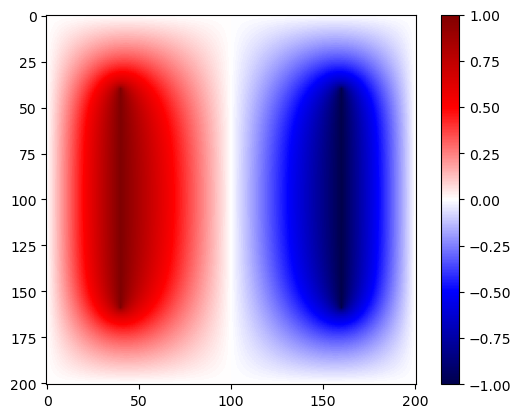

In [8]:
#Plot it
plt.imshow(ϕ, cmap = 'seismic')
plt.colorbar()
plt.show()

**Conclusion:**
Very nice, very ez, just cost me my remaining sanity and a part of my soul. Will use in the future though. Or maybe not.